Grupo: 2 Integrantes: Ziteng Huang, Lubin Ye, Jiahui You

## PACMAN (Sesión 2)
El material y el código de este proyecto es una versión traducida y completada del curso cs188 de la Universidad de Berkeley. Credits: The projects were developed by John DeNero, Dan Klein, Pieter Abbeel, and many others.

En la sesión1, después de descargar el código (search.zip), habéis podido jugar un juego de Pacman controlando el pacman con las flechas del teclado.
En el archivo search.py se os dan implementadas las estrategias de búsqueda vistas en clase: depthFirstSearch, breadthFirstSearch, uniformCostSearch y AStarSearch.
Es importante que revises el código y entiendas perfectamente el funcionamiento.

In [3]:
!python pacman.py
# No estamos indicando el comportamiento del pacman. Por defecto el PACMAN se controla de forma manual (usando las flechas del teclado) se puede elegir qué agente controla al pacman
# usando el parámetro –p.  Los fantasmas tienen por defecto un comportamiento random

Pacman emerges victorious! Score: 1658
Average Score: 1658.0
Scores:        1658.0
Win Rate:      1/1 (1.00)
Record:        Win


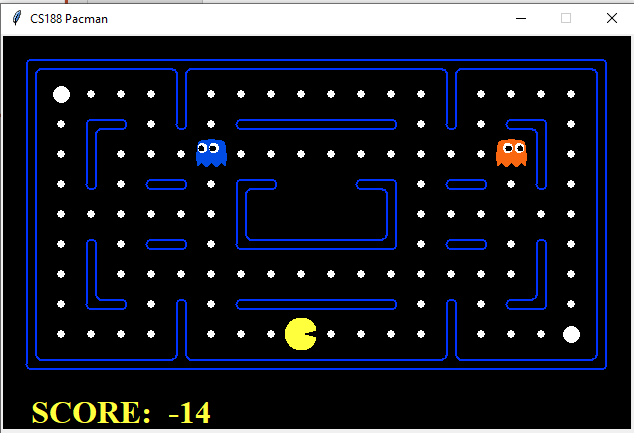

También habéis probado ya en la sesión anterior varios laberintos y algunos agentes muy sencillos 
!python pacman.py --layout testMaze --pacman GoWestAgent

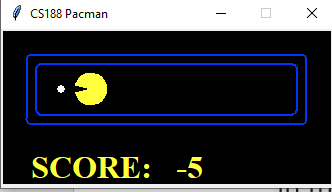

In [4]:
!python pacman.py --layout tinyMaze --pacman GoWestAgent

^C


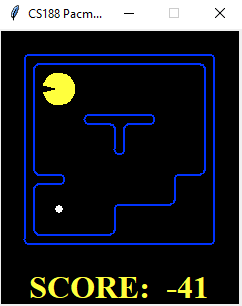

Recuerda que las opciones y parámetros se pueden expresar en formato largo (--layout) o corto (-l). Se puede ver una lista de todas las opciones y valores por defecto con:

In [5]:
!python pacman.py -h

Usage: 
    USAGE:      python pacman.py <options>
    EXAMPLES:   (1) python pacman.py
                    - starts an interactive game
                (2) python pacman.py --layout smallClassic --zoom 2
                OR  python pacman.py -l smallClassic -z 2
                    - starts an interactive game on a smaller board, zoomed in
    

Options:
  -h, --help            show this help message and exit
  -n GAMES, --numGames=GAMES
                        the number of GAMES to play [Default: 1]
  -l LAYOUT_FILE, --layout=LAYOUT_FILE
                        the LAYOUT_FILE from which to load the map layout
                        [Default: mediumClassic]
  -p TYPE, --pacman=TYPE
                        the agent TYPE in the pacmanAgents module to use
                        [Default: KeyboardAgent]
  -t, --textGraphics    Display output as text only
  -q, --quietTextGraphics
                        Generate minimal output and no graphics
  -g TYPE, --ghosts=TYPE
                 

SearchAgent son los agentes que controlan el movimiento de PACMAN utilizan búsqueda para encontrar el camino hasta el punto de comida.  

En este problema simplificado Pac-Man necesita encontrar un determinado punto de comida. Sabemos la posicion inicial del Pac-Man y la posición del punto de comida. Las únicas acciones posibles para Pac-Man son ir Norte, Sur, Este u Oeste.
La solución a este problema es una secuencia de acciones en el tablero. El coste de la
la solución es la suma total del coste de las acciones individuales. Las posiciones (x, y) determinan el espacio de estados. los distintos layouts (en la carpeta layout) incluyen la formalización de posición inicial de Pac-Man, la posición de los puntos de comida y la distribución de las paredes del laberinto. 

In [6]:
!python pacman.py -l tinyMaze -p SearchAgent -a fn=tinyMazeSearch --frameTime=1

[SearchAgent] using function tinyMazeSearch
[SearchAgent] using problem type PositionSearchProblem
Path found with total cost of 8 in 0.0 seconds
Search nodes expanded: 0
Pacman emerges victorious! Score: 502
Average Score: 502.0
Scores:        502.0
Win Rate:      1/1 (1.00)
Record:        Win


### Preguntas 1
Observa la salida de la ejecución anterior. ¿Cuántos nodos se han expandido? ¿cuál es el coste de la solución? 
¿por qué encuentra el agente la comida? 

Echa un vistazo al código que controla este agente (función tinyMazeSearch) en el archivo search.py

Cambia el laberinto (elige otro de la carpeta layouts) ¿encuentra la comida en un laberinto diferente?
¿por qué? Razona la respuesta

Explica por qué falla la siguiente ejecución
!python pacman.py -l mediumClassic -p SearchAgent -a fn=tinyMazeSearch --frameTime=1

In [7]:
!python pacman.py -l mediumClassic -p SearchAgent -a fn=tinyMazeSearch --frameTime=1

[SearchAgent] using function tinyMazeSearch
[SearchAgent] using problem type PositionSearchProblem
Path found with total cost of 999999 in 0.0 seconds
Search nodes expanded: 0


Traceback (most recent call last):
  File "c:\Users\Lubin\OneDrive\Documents\hlocal\AI-Prac\pacmanSearch\pacman.py", line 680, in <module>
    runGames( **args )
  File "c:\Users\Lubin\OneDrive\Documents\hlocal\AI-Prac\pacmanSearch\pacman.py", line 646, in runGames
    game.run()
  File "c:\Users\Lubin\OneDrive\Documents\hlocal\AI-Prac\pacmanSearch\game.py", line 700, in run
    self.state = self.state.generateSuccessor( agentIndex, action )
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lubin\OneDrive\Documents\hlocal\AI-Prac\pacmanSearch\pacman.py", line 107, in generateSuccessor
    PacmanRules.applyAction( state, action )
  File "c:\Users\Lubin\OneDrive\Documents\hlocal\AI-Prac\pacmanSearch\pacman.py", line 343, in applyAction
    raise Exception("Illegal action " + str(action))
Exception: Illegal action South


#### Respuesta 

Nodos expandidos: 0

Coste de la solución: 8 en 0.0s

Porque se ha ingresado la ruta correcta en la función tinyMazeSearch.

No se encuentra, ya que la función tinyMazeSearch solo funciona para ese laberinto.

Falla porque la función tinyMazeSearch no funciona con el mapa mediumClassic. La razón por la que sale error es porque el jugador intenta moverse hacia una pared. 

Como queremos ser capaces de hacer un agente que sea capaz de navegar por distintos tableros no conocidos a priori, no tiene sentido codificar la resolución del problema, hay que hacer una búsqueda que sea capaz de calcular secuencias de acciones para un tablero totalmente nuevo. La ventaja de los agentes basados en búsqueda es que los agentes son **independientes del problema**. 
Los mismos algoritmos de búsqueda pueden resolver otros problemas (como el puzle de 8) una vez que los problemas se modelan como problemas de búsqueda como hemos visto en clase. 
El problema anterior está completamente formalizado en la clase PositionSearchProblem de searchAgents.py.  
Ya que conceptualmente es un problema de búsqueda, su clase extiende la clase Search-Problem. 

- Abre el archivo searchAgents.py y busca la clase PositionSearchProblem. Lee los comentarios e identifica los elementos principales de un problema de búsqueda en el espacio de estados que hemos visto en clase: initial state, goal test, successor y coste. Observa en qué orden se devuelven las acciones legales en el método getSuccessors (el equivalente a actions de la librería AIMA).

- Ahora busca la función depthFirstSearch del archivo search.py y quita los comentarios en las siguientes líneas para ver la información. 

In [9]:
!python pacman.py -l smallMaze -p SearchAgent
## Observa el comportamiento para saber cual es el tipo de búsqueda por defecto si no usamos la opción -fn para indicarlo

[SearchAgent] using function depthFirstSearch
[SearchAgent] using problem type PositionSearchProblem
Start: (11, 6)
Is the start a goal? False
Start's successors: [((11, 7), 'North', 1), ((12, 6), 'East', 1), ((10, 6), 'West', 1)]
Path found with total cost of 49 in 0.0 seconds
Search nodes expanded: 60
Pacman emerges victorious! Score: 461
Average Score: 461.0
Scores:        461.0
Win Rate:      1/1 (1.00)
Record:        Win


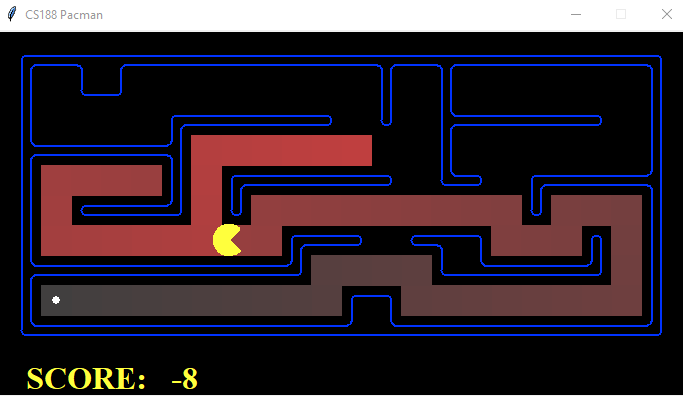

En la ejecución anterior la posición inicial es (11,6)  
problem.getSuccessors(problem.getStartState()) devuelve la lista con 3 tuplas que representan las acciones legales en el estado inicial (solo hay 3 acciones legales porque hay un muro en la posición sur). 
Cada tupla contiene el estado siguiente resultante de aplicar la acción, la acción y el coste. 

Para entender mejor las opciones elimina los comentarios en la función depthFirstSearch (de search.py) el siguiente código que obtiene los sucesores del estado inicial y para cada uno imprime la acción y el coste. Vuelve a ejecutarlo con smallMaze.

In [10]:
!python pacman.py -l smallMaze -p SearchAgent

[SearchAgent] using function depthFirstSearch
[SearchAgent] using problem type PositionSearchProblem
Start: (11, 6)
Is the start a goal? False
Start's successors: [((11, 7), 'North', 1), ((12, 6), 'East', 1), ((10, 6), 'West', 1)]
Path found with total cost of 49 in 0.0 seconds
Search nodes expanded: 60
Pacman emerges victorious! Score: 461
Average Score: 461.0
Scores:        461.0
Win Rate:      1/1 (1.00)
Record:        Win


### Preguntas 2
Compara el comportamiento de las diferentes estrategias de búsquedas en diferentes tableros.
Explica claramente si se encuentra la solución óptima en cada caso. 
¿Qué estrategia te parece mejor para este problema? <br/> __depthFirstSearch, ya que atraviesa el menor número de cuadrículas.__  <br/>
¿Se devuelven las mismas soluciones con los tres algoritmos de búsqueda ciega? <br/> __Sí. Pero la exapasión de los nodos no es la misma.__ <br/>
¿Crees que está utilizando implementaciones con control de repetidos? Razona las respuestas. <br/> __Sí, ya que los 3 algoritmos comprueban que la posición no esté en la lista de de posiciones ya visitadas__ <br/>

Recuerda que si Pacman va demasiado despacio puede usar la opción --frameTime 0.

In [11]:
!python pacman.py -l bigMaze -z .5 -p SearchAgent -a fn=uniformCostSearch --frameTime 0

[SearchAgent] using function uniformCostSearch
[SearchAgent] using problem type PositionSearchProblem
Path found with total cost of 210 in 0.2 seconds
Search nodes expanded: 620
Pacman emerges victorious! Score: 300
Average Score: 300.0
Scores:        300.0
Win Rate:      1/1 (1.00)
Record:        Win


In [7]:
!python pacman.py -l bigMaze -z .5 -p SearchAgent -a fn=bfs --frameTime 0

[SearchAgent] using function bfs
[SearchAgent] using problem type PositionSearchProblem
Path found with total cost of 210 in 0.0 seconds
Search nodes expanded: 620
Pacman emerges victorious! Score: 300
Average Score: 300.0
Scores:        300.0
Win Rate:      1/1 (1.00)
Record:        Win


In [12]:
# !python pacman.py -l bigMaze -z .5 -p SearchAgent
# por defecto es busqueda en profundidad que tambien se puede especificar con
!python pacman.py -l bigMaze -z .5 -p SearchAgent -a fn=depthFirstSearch --frameTime 0

[SearchAgent] using function depthFirstSearch
[SearchAgent] using problem type PositionSearchProblem
Start: (35, 1)
Is the start a goal? False
Start's successors: [((35, 2), 'North', 1), ((34, 1), 'West', 1)]
Path found with total cost of 210 in 0.0 seconds
Search nodes expanded: 391
Pacman emerges victorious! Score: 300
Average Score: 300.0
Scores:        300.0
Win Rate:      1/1 (1.00)
Record:        Win


In [13]:
!python pacman.py -l trickySearch -p SearchAgent -a fn=dfs

[SearchAgent] using function dfs
[SearchAgent] using problem type PositionSearchProblem
Start: (9, 3)
Is the start a goal? False
Start's successors: [((10, 3), 'East', 1), ((8, 3), 'West', 1)]
Path found with total cost of 52 in 0.0 seconds
Search nodes expanded: 58


In [15]:
!python pacman.py -l bigMaze -z .5 -p SearchAgent -a fn=uniformCostSearch

[SearchAgent] using function uniformCostSearch
[SearchAgent] using problem type PositionSearchProblem
Path found with total cost of 210 in 0.1 seconds
Search nodes expanded: 620
Pacman emerges victorious! Score: 300
Average Score: 300.0
Scores:        300.0
Win Rate:      1/1 (1.00)
Record:        Win


In [7]:
!python pacman.py -l mediumMaze -p SearchAgent -a fn=bfs

[SearchAgent] using function bfs
[SearchAgent] using problem type PositionSearchProblem
Path found with total cost of 68 in 0.0 seconds
Search nodes expanded: 269
Pacman emerges victorious! Score: 442
Average Score: 442.0
Scores:        442.0
Win Rate:      1/1 (1.00)
Record:        Win


In [23]:
!python pacman.py -l smallMaze -p SearchAgent -a fn=bfs

[SearchAgent] using function bfs
[SearchAgent] using problem type PositionSearchProblem
Path found with total cost of 19 in 0.0 seconds
Search nodes expanded: 92
Pacman emerges victorious! Score: 491
Average Score: 491.0
Scores:        491.0
Win Rate:      1/1 (1.00)
Record:        Win


### Preguntas 3
Ejecuta los agentes StayEastSeachAgent y StayWestSearchAgent en los laberintos de nombre __mediumDottedMaze__ y __mediumScaryMaze__ utilizando la búsqueda de coste uniforme.


python pacman.py -l mediumDottedMaze -p StayEastSearchAgent

python pacman.py -l mediumScaryMaze -p StayWestSearchAgent


In [17]:
!python pacman.py -l mediumDottedMaze -p StayEastSearchAgent 

Path found with total cost of 1 in 0.0 seconds
Search nodes expanded: 186
Pacman emerges victorious! Score: 646
Average Score: 646.0
Scores:        646.0
Win Rate:      1/1 (1.00)
Record:        Win


In [24]:
!python pacman.py -l mediumScaryMaze -p StayWestSearchAgent

Path found with total cost of 111111111111111111111111111762625640 in 0.0 seconds
Search nodes expanded: 98
Pacman emerges victorious! Score: 418
Average Score: 418.0
Scores:        418.0
Win Rate:      1/1 (1.00)
Record:        Win


Prueba a cambiar el coste de las acciones (para darle más sentido al algorimto de coste uniforme) si consideramos que algunas posiciones del tablero son mejores que otras (tienen más valor) por ejemplo, las posiciones en una intersección o cruce de caminos, debemos modelarlo utilizando una función de coste que asigna diferentes valores a las acciones. 

Identifica en el archivo searchAgents.py la descripción de los agentes __StayEastSeachAgent__ y __StayWestSearchAgent__
y analiza la función de coste. ¿Qué quiere decir que el coste es .5 ∗∗ x para entrar en (x, y)? ¿Por qué está asociado a StayWestAgent? <br/>
__Quiere decir que si la x es muy pequeña, es decir, se va hacia la izquierda, el coste es cada vez mayor, mientras que si se va hacia la derecha es cada vez menor. Esta expresión está asociada con StayEastAgent__ <br/>

Modifica la función de coste y observa cómo afecta al comportamiento. 

¿Cuando se comporta igual que la búsqueda en anchura? <br/>
__Cuando se le aumenta el exponente de la función de coste, para que así tienda a ir más a la izquierda__ <br/>
Cambia la función de coste en __StayWestSearchAgent__ para que se comporte como la búsqueda en anchura y observa el comportamiento. Despues vuelve a dejar la función de coste original.

### Preguntas 4
Abre el archivo ghostAgents.py y prueba a incluir y cambiar el comportamiento de los fantasmas del tablero.  Realiza algunas pruebas con distintas búsquedas y comenta los resultados obtenidos.
Algunos tableros como mediumScaryMaze incluyen fantasmas (puedes abrirlo en un editor de texto para ver el formato de los tableros. Puedes cambiar el tipo de los fantasmas y el número con las opciones.


In [31]:
!python pacman.py -l mediumScaryMaze -p SearchAgent -a fn=bfs --frameTime 0

[SearchAgent] using function bfs
[SearchAgent] using problem type PositionSearchProblem
Path found with total cost of 72 in 0.0 seconds
Search nodes expanded: 279
Pacman died! Score: -515
Average Score: -515.0
Scores:        -515.0
Win Rate:      0/1 (0.00)
Record:        Loss


In [34]:
!python pacman.py -l trickySearch -k 3 -p SearchAgent -a fn=dfs

[SearchAgent] using function dfs
[SearchAgent] using problem type PositionSearchProblem
Start: (9, 3)
Is the start a goal? False
Start's successors: [((10, 3), 'East', 1), ((8, 3), 'West', 1)]
Path found with total cost of 52 in 0.0 seconds
Search nodes expanded: 58


In [35]:
!python pacman.py -l mediumScaryMaze -p SearchAgent -a fn=bfs

[SearchAgent] using function bfs
[SearchAgent] using problem type PositionSearchProblem
Path found with total cost of 72 in 0.0 seconds
Search nodes expanded: 279
Pacman died! Score: -528
Average Score: -528.0
Scores:        -528.0
Win Rate:      0/1 (0.00)
Record:        Loss


In [ ]:
!python pacman.py -l mediumClassic -p SearchAgent -a fn=bfs 

### Búsqueda heurística 

Hasta ahora sólo hemos probado los algoritmos de búsqueda ciega. Vamos a ver también el comportamiento de la búsqueda heurística.
La función A* graph search está implementada en aStarSearch en el archivo search.py.  
A* utiliza una función heurística que recibe como argumento. 
Las funciones heurísticas tienen dos argumentos: el estado y el problema (para tener acceso a la información fija del problema). 
Puedes ver un ejemplo trivial en la función nullHeuristic de search.py
Observa las implementaciones de otras heurísticas dadas: manhattanHeuristic y euclideanHeuristic y pruebalas para encontrar el camino a una posición destino fija. 

In [29]:
!python pacman.py -l bigMaze -z .5 -p SearchAgent -a fn=astar,heuristic=manhattanHeuristic --frameTime 0

[SearchAgent] using function astar and heuristic manhattanHeuristic
[SearchAgent] using problem type PositionSearchProblem
Path found with total cost of 210 in 0.1 seconds
Search nodes expanded: 549
Pacman emerges victorious! Score: 300
Average Score: 300.0
Scores:        300.0
Win Rate:      1/1 (1.00)
Record:        Win


In [30]:
!python pacman.py -l bigMaze -z .5 -p SearchAgent -a fn=astar,heuristic=euclideanHeuristic --frameTime 0

[SearchAgent] using function astar and heuristic euclideanHeuristic
[SearchAgent] using problem type PositionSearchProblem
Path found with total cost of 210 in 0.1 seconds
Search nodes expanded: 557
Pacman emerges victorious! Score: 300
Average Score: 300.0
Scores:        300.0
Win Rate:      1/1 (1.00)
Record:        Win


### Pregunta 5

Observa en los resultados (nodos expandidos y coste de la solución) que A* encuentra la solución óptima un poco más rápido que la búsqueda de costo uniforme (aproximadamente 549 frente a 620 nodos de búsqueda expandidos en nuestra implementación, pero los empates en la prioridad pueden hacer que se obtengan varios ligeramente diferentes). 

Realiza las pruebas para ver qué sucede en openMaze para las distintas estrategias de búsqueda. Comenta detalladamente los resultados obtenidos. <br/>
 __Sabemos que el depthFirstSearch obtiene la primera solución válida sin improtar si es óptima o no, por lo que saca la solución donde se recorre todas las casillas posibles, mientras que en el algoritmo A*, se opta por el más óptimo__

In [36]:
!python pacman.py -l openMaze -z .5 -p SearchAgent -a fn=dfs --frameTime 0

[SearchAgent] using function dfs
[SearchAgent] using problem type PositionSearchProblem
Start: (35, 21)
Is the start a goal? False
Start's successors: [((35, 20), 'South', 1), ((34, 21), 'West', 1)]
Path found with total cost of 298 in 0.0 seconds
Search nodes expanded: 807
Pacman emerges victorious! Score: 212
Average Score: 212.0
Scores:        212.0
Win Rate:      1/1 (1.00)
Record:        Win


In [37]:
!python pacman.py -l openMaze -z .5 -p SearchAgent -a fn=astar --frameTime 0

[SearchAgent] using function astar and heuristic nullHeuristic
[SearchAgent] using problem type PositionSearchProblem
Path found with total cost of 54 in 0.1 seconds
Search nodes expanded: 682
Pacman emerges victorious! Score: 456
Average Score: 456.0
Scores:        456.0
Win Rate:      1/1 (1.00)
Record:        Win


### Pregunta 6

Para ver realmente las ventajas de usar A* vamos a usar otro problema de búsqueda más desafiante (CornersProblem). Anteriormente hemos resuelto el problema prob='PositionSearchProblem', 

En los laberintos tipo _Corner_, hay cuatro puntos de comida, uno en cada esquina. Nuestro nuevo problema de búsqueda es encontrar el camino más corto a través del laberinto que toque las cuatro esquinas (da igual que el laberinto realmente tenga comida allí o no). 

Tened en cuenta que en algunos laberintos como tinyCorners, el camino más corto no siempre va primero a la comida más cercana. 
Pista: el camino más corto a través de tinyCorners tiene 28 pasos.

Observa la implementación del problema de búsqueda CornersProblem en searchAgents.py. 
Observa cómo ha cambiado la representación del estado. 

¿Qué información se codifica en el estado para detectar si se han alcanzado las cuatro esquinas?  

__top, right = self.walls.height-2, self.walls.width-2__

__self.corners = ((1, 1), (1, top), (right, 1), (right, top))__

In [38]:
!python pacman.py -l tinyCorners -p SearchAgent -a fn=bfs

[SearchAgent] using function bfs
[SearchAgent] using problem type PositionSearchProblem
Path found with total cost of 7 in 0.0 seconds
Search nodes expanded: 20


In [39]:
!python pacman.py -l tinyCorners -p SearchAgent -a fn=dfs

[SearchAgent] using function dfs
[SearchAgent] using problem type PositionSearchProblem
Start: (4, 5)
Is the start a goal? False
Start's successors: [((4, 6), 'North', 1), ((5, 5), 'East', 1), ((3, 5), 'West', 1)]
Path found with total cost of 7 in 0.0 seconds
Search nodes expanded: 8


In [40]:
!python pacman.py -l mediumCorners -p SearchAgent -a fn=astar,heuristic=cornersHeuristic,prob=CornersProblem

[SearchAgent] using function astar and heuristic cornersHeuristic
[SearchAgent] using problem type CornersProblem
Path found with total cost of 106 in 0.2 seconds
Search nodes expanded: 1136
Pacman emerges victorious! Score: 434
Average Score: 434.0
Scores:        434.0
Win Rate:      1/1 (1.00)
Record:        Win


¿Cuántos nodos expande la búsqueda en el laberinto mediumCorners con breadthFirstSearch? - expands just under 2000 search nodes on mediumCorners. ¿Podemos usar la búsqueda heuristica (A* search) con la heurística manhattanHeuristic? ¿Cuántos nodos expande la búsqueda heuristica (A* search) con la heurística cornersHeuristic? 1136 Revisa el código y justifica si crees que la heurística CornersHeuristic es admisible y consistente. ¿Crees que es una buena heurística? ¿Puedes pensar otra h' admisible y consistente para este problema? Comenta los resultados obtenidos y prueba otros algoritmos comentando los resultados.

### Pregunta 7
Vamos a resolver ahora otro problema de búsqueda: comer toda la comida de Pacman en el menor número de pasos posible. 
Para ello hemos incluido una nueva definición de problema de búsqueda que formalice el problema de eliminación de alimentos: FoodSearchProblem en searchAgents.py  (revisa el código).

Se define una solución como un camino que recoge toda la comida del mundo Pacman. 

Para este problema las soluciones no tienen en cuenta fantasmas ni power pills; Las soluciones sólo dependen de la ubicación de las paredes, la comida habitual y Pacman. 

In [11]:
!python pacman.py -l testSearch -p SearchAgent -a fn=astar,prob=FoodSearchProblem,heuristic=foodHeuristic

[SearchAgent] using function astar and heuristic foodHeuristic
[SearchAgent] using problem type FoodSearchProblem
Path found with total cost of 7 in 0.0 seconds
Search nodes expanded: 10
Pacman emerges victorious! Score: 513
Average Score: 513.0
Scores:        513.0
Win Rate:      1/1 (1.00)
Record:        Win


Piensa cómo definir una heurística consistente para este problema.  
Puedes implementarla y compararla con la que te damos nosotros: foodHeuristic en el archivo searchAgents.py 
Observa su comportamiento y justifica si es admisible y consistente. 

Ejecuta la búsqueda con esa heurística en el tablero trickySearch
¿Cuántos nodos expande? 10


In [ ]:
!python pacman.py -l trickySearch -p AStarFoodSearchAgent

### Pregunta 8
A veces, incluso con A* y una buena heurística, es difícil encontrar el camino óptimo a través de todos los puntos. En estos casos, todavía nos gustaría encontrar un camino razonablemente bueno y rápidamente. 
El agente ClosestDotSearchAgent que implementa en searchAgents.py siempre se come con avidez el punto más cercano.
Fíjate que hay una función clave que encuentra una ruta al punto de comida más cercano (findPathToClosestDot en searchAgents.py). 

¿Cómo se comporta este agente? ¿Crees que resuelve el laberinto de forma óptima? No.

Realmente este agente ClosestDotSearchAgent no encuentra siempre el camino más corto en el laberinto. 
Asegurate de que entiendes por qué y diseña un pequeño ejemplo donde ir al punto de comida más cercano no resulta el camino más corto para comerse todos los puntos. 


In [13]:
!python pacman.py -l smallSearch -p ClosestDotSearchAgent -z .5

[SearchAgent] using function depthFirstSearch
[SearchAgent] using problem type PositionSearchProblem
Path found with cost 48.
Pacman emerges victorious! Score: 622
Average Score: 622.0
Scores:        622.0
Win Rate:      1/1 (1.00)
Record:        Win


In [14]:
!python pacman.py -l bigSearch -p ClosestDotSearchAgent -z .5

[SearchAgent] using function depthFirstSearch
[SearchAgent] using problem type PositionSearchProblem
Path found with cost 350.
Pacman emerges victorious! Score: 2360
Average Score: 2360.0
Scores:        2360.0
Win Rate:      1/1 (1.00)
Record:        Win


In [4]:
!python pacman.py -l ClosestDotSearch -p ClosestDotSearchAgent -z .5

[SearchAgent] using function depthFirstSearch
[SearchAgent] using problem type PositionSearchProblem
Path found with cost 38.
Pacman emerges victorious! Score: 652
Average Score: 652.0
Scores:        652.0
Win Rate:      1/1 (1.00)
Record:        Win
